<a href="https://colab.research.google.com/github/martinj2-dot/CSC386-Wall-Follower/blob/main/username_CSC386_Graph_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A00: Graph Search
* This assignment should be done individually or with a partner.
* You should seek help completing this assignment from the TAs at the evening lab.

### Learning Objectives 
* Practice breaking a larger problem down into smaller pieces using functions.
* Gain practice manipulating arrays.
* Establish an understanding of graph search algorithms and their applications.

### How to Start
* To begin, save a copy in Drive and share it with all members of your team. **Colab does not let you make changes until you save a copy.**
* Change the file name of this document to username1, username2 - A00: Wall Follower (for example, neillz, martinj2 - A00: Graph Search). 

### Additional Notes
This assignment utilizes Google Colab. If you are unfamiliar with Colab, don’t worry. The idea is that you can write both code and read text. **Real-time saving was deprecated in 2018. Your partner must refresh the page to see your changes.** This is a good time to practice pair programming and the driver/navigator dynamic. 

The assignment has multiple activities. There is no git workflow associated with this project. Once you are finished, submit the link to Moodle.

The following code downloads and stores our data in a data folder to be used in our searches. It is a text file with the nodes that form the edges and their weights. The file is printed below. 

In [ ]:
import os, shutil
if os.path.exists("/content/data"): shutil.rmtree("/content/data") # avoid accidentally re-downloading the file
os.mkdir("/content/data")
!wget -P /content/data https://raw.githubusercontent.com/martinj2-dot/CSC386-Wall-Follower/main/data.txt # Read the downloaded data
with open("/content/data/data.txt") as file: print("\nThe file looks like:\n"+file.read())

--2021-12-05 06:06:10--  https://raw.githubusercontent.com/martinj2-dot/CSC386-Wall-Follower/main/data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 424 [text/plain]
Saving to: ‘/content/data/data.txt’

data.txt            100%[===================>]     424  --.-KB/s    in 0s      

2021-12-05 06:06:10 (19.4 MB/s) - ‘/content/data/data.txt’ saved [424/424]


The file looks like:
benton_harbor kalamazoo 52
kalamazoo ann_arbor 99
ann_arbor detroit 42
benton_harbor grand_rapids 80
grand_rapids kalamazoo 50
grand_rapids lansing 67
lansing ann_arbor 65
lansing detroit 90
alma lansing 54
flint detroit 80
flint saginaw 40
alma saginaw 38
cadillac alma 84
traverse_city cadillac 48
saginaw alpena 148
traverse_city mackinaw_city 116
alpena mackinaw_city 94
macki

In [ ]:
class Node: 
  """
  parent: The index of the parent node of the current node
  distances: the distance of each node, inatilized high and updated from data in mi_graph.txt
  visited: boolean type, whether or not the node has been visited
  queued: boolean type, whether or not the node has been queued
  """
  def __init__(self):
    self.parent = -1
    self.distances = 1e6
    self.visited = False
    self.queued = False
    self.key_list = []
    self.val_list = []
class Graph:
  def __init__(self): 
    self.content = open("/content/data/data.txt", "r")
    self.data = []
    self.edge_costs = {}
    self.edges = {}
    self.nodes = []
    self.createGraph()
  def createGraph(self):
    node = True
    count = 0
    lines = self.content.readlines()
    for line in lines:
      if "^" in line: 
        node = False
        num_nodes = count
      if node: # If the line is a node
        self.data.append(line)
        count +=1
      else:
        if not "^" in line:
          for i in range(num_nodes):
            file_to_edge = line.split()
            c1 = self.nameToIdx(file_to_edge[0], self.data)
            c2 = self.nameToIdx(file_to_edge[1], self.data)
            self.edges[file_to_edge[0]] = [c2, i]
            self.edges[file_to_edge[1]] = [c1, i]
            self.edge_costs[file_to_edge[0]] = [float(file_to_edge[2]), i]
            self.edge_costs[file_to_edge[1]] = [float(file_to_edge[2]), i]
    edges_list = list(self.edges.keys())
    costs_list = list(self.edge_costs.values())
    self.edges_list = [edge[1] for edge in len(self.edges_list)]
    self.edges_list = [cost[1] for cost in len(self.costs_list)]

  def nameToIdx(name, v):
    for i in range(len(v)):
      if self.edges == name: return i 
      else: return -1

def tracePath(n, g):
  path = []
  current = n
  while current != -1:
    path.append(current)
    current = getParent(current, g)

  # Since we built the path backwards, we need to reverse it.
  reverse(path.begin(), path.end())
  return path

def getNeighbors(n, g): return g.edges[str(n)]

def getEdgeCosts(n, g): return g.edge_costs[str(n)]

def getParent(idx, g): return g.nodes[idx].parent 

def initGraph(g):
  # populates a vector of nodes with size(graph data)
    for i in range(len(g.data)):
      node = Node()
      g.nodes.append(node)

def bfs(start, goal, g):
  initGraph(g)
  path = []
  visit_list = []
  currentIdx = start
  g.nodes[currentIdx].distances = 0
  g.nodes[currentIdx].queued = True
  visit_list.append(currentIdx)

  while visit_list:
    currentIdx = visit_list[0]
    g.nodes[currentIdx].visited = True
    neighbors = getNeighbors(currentIdx, g)
    edge_weights = getEdgeCosts(currentIdx, g)
    if currentIdx == goal:           # Checks to see if current node is goal node. Returns path of it is
      path = tracePath(currentIdx, g)
      break
    visit_list.pop()

    for i in range(len(neighbors)):                # Populates node data for each node, within the vector of nodes.
      if not g.nodes[neighbors[i]].visited:        # Checks to see if the node has been visited
        if not g.nodes[neighbors[i]].queued:       # Checks to see if the node has been queued
          visit_list.push(neighbors[i])            # Pushes current node to the back of the queue if all conditions are false

        if g.nodes[neighbors[i]].distances > g.nodes[currentIdx].distances + edge_weights[i]: # what happens if we run into a loop
          g.nodes[neighbors[i]].distances = g.nodes[currentIdx].distances + edge_weights[i] # updates distances of current node
          g.nodes[neighbors[i]].parent = currentIdx # sets parent index to current index of the current node
  return path

def main():
  g = Graph()
  start = g.nameToIdx("ann_arbor", g.data)
  goal = g.nameToIdx("marquette", g.data)

  f"Searching for a path from {g.data[start]} (index: {start}) to {g.data[goal]} (index: {goal})...\n"
  path = bfs(start, goal, g)
  
  if len(path) < 1: print("No path found :(\n")
  else:
    print("Path: ")
    for i in range(len(path)-1): f"{g.data[path[i]]} -> "
    f"(g.data[path[-1]]\n"

  return 0

if __name__ == "__main__":
  main()


TypeError: ignored

The following code creates the nodes and edges plus their weights. They are stored in nx.nodes(g) and nx.edges(g). We are using the powerful networkx module. Networkx populates nx.nodes(g) and nx.edges(g) for us behind the scenes. 


Nodes: ['benton_harbor', 'kalamazoo', 'ann_arbor', 'detroit', 'grand_rapids', 'lansing', 'alma', 'flint', 'saginaw', 'cadillac', 'traverse_city', 'alpena', 'mackinaw_city', 'escanaba', 'marquette']
Edges: [('benton_harbor', 'kalamazoo'), ('benton_harbor', 'grand_rapids'), ('kalamazoo', 'ann_arbor'), ('kalamazoo', 'grand_rapids'), ('ann_arbor', 'detroit'), ('ann_arbor', 'lansing'), ('detroit', 'lansing'), ('detroit', 'flint'), ('grand_rapids', 'lansing'), ('lansing', 'alma'), ('alma', 'saginaw'), ('alma', 'cadillac'), ('flint', 'saginaw'), ('saginaw', 'alpena'), ('cadillac', 'traverse_city'), ('traverse_city', 'mackinaw_city'), ('alpena', 'mackinaw_city'), ('mackinaw_city', 'escanaba'), ('escanaba', 'marquette')]




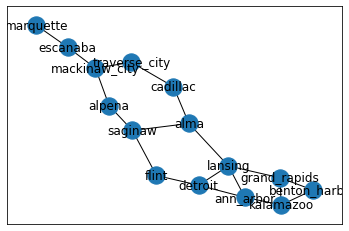

In [ ]:
import networkx as nx
# import matplotlib.pyplot as plt

g = nx.Graph()
with open("/content/data/data.txt") as file:
  lines = file.readlines()
  for line in lines:
    edges = line.split()
    g.add_edge(edges[0], edges[1], weight=edges[2])
print("\nNodes: " + str(nx.nodes(g)))
print("Edges: " + str(nx.edges(g)) + "\n\n")
nx.draw_networkx(g)

In [ ]:
nx.dijkstra_path(g, "ann_arbor", "marquette", "")
# start = "ann_arbor"
# bfs_route = list(nx.bfs_edges(g, start))
# start = 0
# current_weight = 0
# visit_list = []

# for edge in bfs_route: 
#   if edge[0] in visit_list: 
#     if weight < 
#     pass 
#   else:
#     weight = g[edge[0]][edge[1]])
#     visit_list.append(weight)


# path = []
# start = "ann_arbor"
# g.nodes[start] = 0
# g.nodes[start].queued = True
# visit_list = []
# visit_list.append(start)
# while visit_list:
#   current = visit_list[0]
#   g.nodes[current].visited = True
#   neighbors = nx.all_neighbors(g)
#   edge_weights = getEdgeCosts(currentIdx, g)
#   if currentIdx == goal:           # Checks to see if current node is goal node. Returns path of it is
#     path = tracePath(currentIdx, g)
#     break
#   visit_list.pop()

#   for i in range(len(neighbors)):                # Populates node data for each node, within the vector of nodes.
#     if not g.nodes[neighbors[i]].visited:        # Checks to see if the node has been visited
#       if not g.nodes[neighbors[i]].queued:       # Checks to see if the node has been queued
#         visit_list.push(neighbors[i])            # Pushes current node to the back of the queue if all conditions are false

#       if g.nodes[neighbors[i]].distances > g.nodes[currentIdx].distances + edge_weights[i]: # what happens if we run into a loop
#         g.nodes[neighbors[i]].distances = g.nodes[currentIdx].distances + edge_weights[i] # updates distances of current node
#         g.nodes[neighbors[i]].parent = currentIdx # sets parent index to current index of the current node

# print(list(nx.all_neighbors(g, "mackinaw_city")))

['ann_arbor',
 'detroit',
 'flint',
 'saginaw',
 'alpena',
 'mackinaw_city',
 'escanaba',
 'marquette']

In [ ]:
from collections import deque

class Node:
  def __init__(self, key):
    # unique ID for node
    self.id = key
    # dict of connected nodes
    self.connected_to = {}
  
  def add_neighbor(self, neighbor, weight=0):
    # Add an entry to the connected_to dict with a given weight         
    self.connected_to[neighbor] = weight
      
  def __str__(self):
    # override __str__ for printing         
    return(str(self.id) + ' connected to: ' + str([x.id for x in self.connected_to]))
  
  def get_connections(self):
    # return keys from connected_to dict
    return self.connected_to.keys()
  
  def get_id(self):
    # return node id's
    return self.id
  
  def get_weight(self):
    # return weights of edges connected to node 
    return self.connected_to[neighbor]

class Graph:
  def __init__(self):
    # dictionary of nodes         
    self.nodes_list = {}
    # node count         
    self.num_nodes = 0
      
  def add_node(self, key):
    # increment counter when adding node
    self.num_nodes = self.num_nodes + 1
    new_node = Node(key)
    self.nodes_list[key] = new_node
    return new_node
  
  def get_node(self, n):
    # check if node exists, return if True
    if n in self.nodes_list:
      return self.nodes_list[n]
    else: return None
      
  def __contains__(self, n):
      # override __contains__ to list all nodes in Graph object
      return n in self.nodes_list
  
  def add_edge(self, s, f, cost=0):
    # add edge to graph; s = start node; e = end node
    if s not in self.nodes_list:
      nv = self.add_node(s)
    if f not in self.nodes_list:
      nv = self.add_node(f)
    self.nodes_list[s].add_neighbor(self.nodes_list[f], cost)
      
  def get_nodes(self):
    # return keys of nodes in Graph
    return self.nodes_list.keys()
  
  def __iter__(self):
    # override __iter__ to return iterable of nodes
    return iter(self.nodes_list.values())
  
node_names = ["A", "B", "C", "D", "E", "F", "G"]
# Instantiate graph object and add nodes 
g = Graph()

for i in node_names:
  g.add_node(i)

# add a bunch of edges between nodes 
g.add_edge('A','B')
g.add_edge('B','C')
g.add_edge('C','E')
g.add_edge('E','D')
g.add_edge('D','B')
g.add_edge('E','F')
g.add_edge('B','E')
for v in g:
  for w in v.get_connections():
    print("(%s, %s)" % (v.get_id(), w.get_id()))

# list our vertices 
for i in node_names:
  print(g.get_node(i))


def breadth_first_search(starting_node, goal_node):
  visited_nodes = set()
  queue = deque([starting_node])
  
  while len(queue) > 0:
    node = queue.pop()
    if node in visited_nodes:
      continue
    
    visited_nodes.add(node)
    if node.get_id == goal_node.get_id:
      return True
    
    for n in node.connected_to:
      if n not in visited_nodes:
        queue.appendleft(n)
  return False

print(breadth_first_search(g.get_node('A'), g.get_node('G')))


(A, B)
(B, C)
(B, E)
(C, E)
(D, B)
(E, D)
(E, F)
A connected to: ['B']
B connected to: ['C', 'E']
C connected to: ['E']
D connected to: ['B']
E connected to: ['D', 'F']
F connected to: []
G connected to: []
False


### Submission Instructions
* Set the link to “Anyone with the link can view”.
* Submit the link to Moodle.